In [ ]:
# Installieren der notwendigen Module

In [13]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importieren der Module

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob as gb
from mpl_toolkits.basemap import Basemap

In [ ]:
# Testing: Erstellen einer Weltkarte; Testing der Parameter; Bremen als Landmark

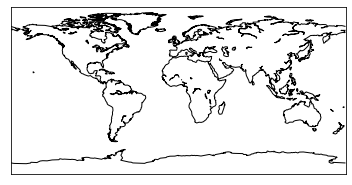

In [6]:
map = Basemap()
map.drawcoastlines()

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


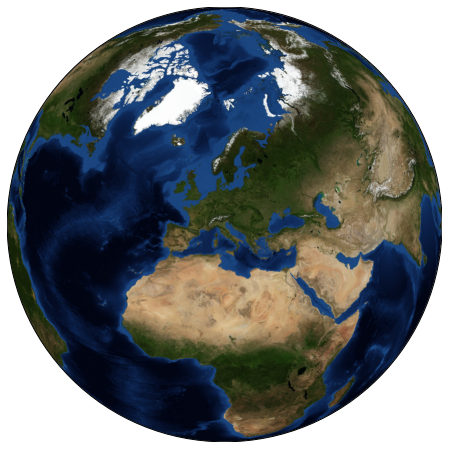

In [7]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=45, lon_0=12)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


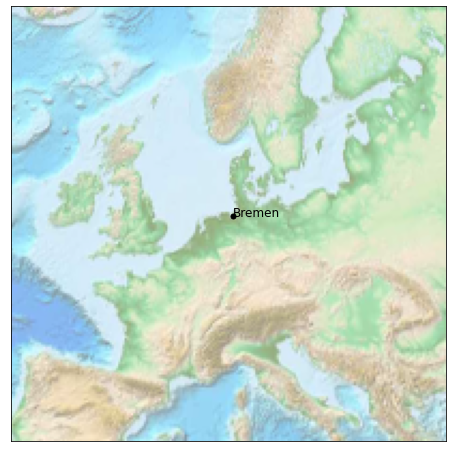

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=3E6, height=3E6, lat_0=53, lon_0=8,)
m.etopo(scale=0.5, alpha=0.5)

x, y = m(8.48, 53.5)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Bremen', fontsize=12);

In [9]:
# Nachfolgend werden die Auflösungen "low" und "intermediate" gewählt, um zu verdeutlichen, wie die Kanten sich
# detaillieren - es sind noch weitere Detaillierungsgrade möglich ("high" und "full"), diese sind allerdings 
# sehr viel rechenintensiver und nicht in den "defaults" angelegt.
# (Mandelbrot & Hudson (2005): Fraktale und Finanzen)

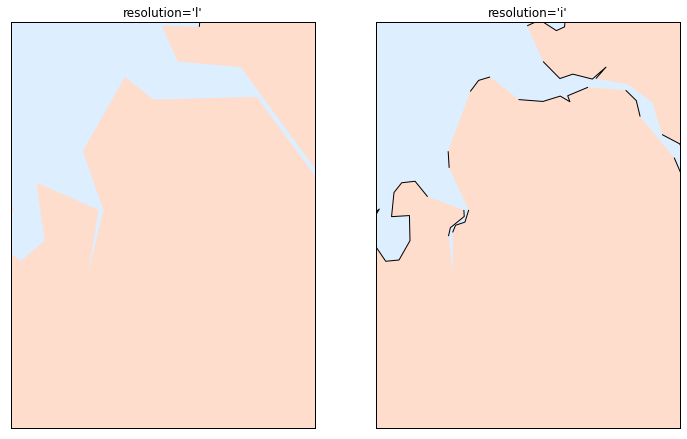

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'i']):
    m = Basemap(projection='gnom', lat_0=53.5, lon_0=8.84, width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [11]:
from itertools import chain

def draw_map(m, scale=0.2):
    
    m.shadedrelief(scale=scale)
    
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    
    all_lines = chain(lat_lines, lon_lines)
    
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
    

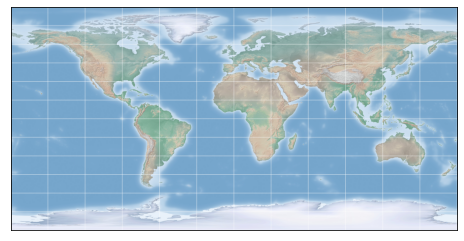

In [12]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,)

draw_map(m)

In [30]:
earthquakes = pd.read_csv("earthquake2006-2016.csv")

cities = pd.read_csv("cities.csv")


In [ ]:
# Anzeigen des Data Frame

In [31]:
df = pd.read_csv('earthquake2006-2016.csv', sep=';')

df.columns

Index(['Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status'], dtype='object')

In [ ]:
# Data Understanding

(array([3.445e+03, 1.398e+03, 4.120e+02, 2.760e+02, 8.200e+01, 5.800e+01,
        3.200e+01, 8.000e+00, 2.000e+00, 2.000e+00]),
 array([5.5 , 5.86, 6.22, 6.58, 6.94, 7.3 , 7.66, 8.02, 8.38, 8.74, 9.1 ]),
 <BarContainer object of 10 artists>)

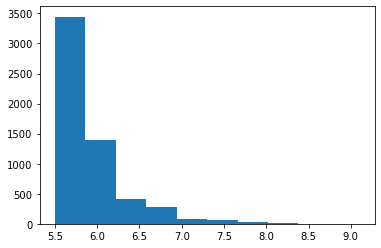

In [32]:
plt.hist(earthquakes['Magnitude'])

In [24]:
df_2 = pd.read_csv('cities.csv', sep=';')

df_2.columns

Index(['city,"city_ascii","lat","lng","country","iso2","iso3","admin_name","capital","population","id"'], dtype='object')

In [ ]:
# Extraktion der Längen- und Breitengrade

In [33]:
lat = earthquakes['Latitude'].values
lon = earthquakes['Longitude'].values

magnitude = earthquakes['Magnitude'].values

In [26]:
lat_1 = cities['lat'].values
lon_1 = cities['lng'].values

name = cities['city'].values

In [27]:
# Mapping der Erdbeben und der Städte aus den Ursprungsdateien

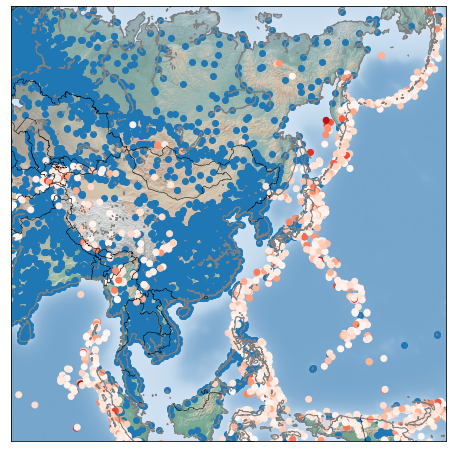

In [37]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', resolution='i', lat_0=37.5, lon_0=119, width=10E6, height=10E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='gray')

# je dunkler, desto schwerer ist das Erdbeben

m.scatter(lon_1, lat_1, latlon=True, cmap="Blues", alpha=1)
m.scatter(lon, lat, latlon=True, c=np.log10(magnitude), cmap='Reds', alpha=1)